In [86]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [4]:
df=pd.read_csv(r"C:\Users\Archit Verma\Downloads\archive\marketing_campaign.csv",sep="\\t",engine='python')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data Cleaning and feature engineering

In [7]:
df.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
df['Income'].isna().sum()

np.int64(24)

In [13]:
df['Income'].fillna(df['Income'].median(),inplace=True)

C:\Users\Archit Verma\AppData\Local\Temp\ipykernel_82044\789465415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(),inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='mixed',dayfirst=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [16]:
df['Dt_Customer'].dtype

dtype('<M8[ns]')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [18]:
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [19]:
df['customer_since_year']=df['Dt_Customer'].dt.year

In [20]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_since_year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,2013
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,2014
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,2014


In [21]:
df['Customer_tenure']=(pd.Timestamp('today')-df['Dt_Customer']).dt.days/365
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_since_year,Customer_tenure
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,2012,13.465753
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2014,11.958904
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2013,12.504110
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,2014,12.030137
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2014,12.090411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,2013,12.693151
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,2014,11.701370
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,2014,12.073973
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,2014,12.076712


In [22]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_since_year,Customer_tenure
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,2012,13.465753
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2014,11.958904
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2013,12.504110
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,2014,12.030137
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2014,12.090411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,2013,12.693151
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,2014,11.701370
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,2014,12.073973
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,2014,12.076712


In [23]:
df['Age']=2026-df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_since_year,Customer_tenure,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,2012,13.465753,69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2014,11.958904,72
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2013,12.504110,61
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2014,12.030137,42
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014,12.090411,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,2013,12.693151,59
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,2014,11.701370,80
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,2014,12.073973,45
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,2014,12.076712,70


In [24]:
df['Dt_Customer'].sample(10)

1344   2013-03-20
531    2013-09-18
649    2013-09-16
1356   2013-04-22
1796   2013-10-03
1485   2013-03-03
879    2013-01-17
1743   2013-01-16
228    2012-08-08
265    2013-03-14
Name: Dt_Customer, dtype: datetime64[ns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [26]:
df['Teenhome']

0       0
1       1
2       0
3       0
4       0
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Teenhome, Length: 2240, dtype: int64

In [27]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_since_year,Customer_tenure,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,2012,13.465753,69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2014,11.958904,72
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2013,12.504110,61
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2014,12.030137,42
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014,12.090411,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,2013,12.693151,59
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,2014,11.701370,80
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,2014,12.073973,45
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,2014,12.076712,70


In [28]:
df['Family_size']=df['Kidhome']+df['Teenhome']+2
df['Has_children']=np.where((df['Kidhome']+df['Teenhome'])>0,1,0)

In [29]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_since_year,Customer_tenure,Age,Family_size,Has_children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,2012,13.465753,69,2,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2014,11.958904,72,4,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2013,12.504110,61,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,2014,12.030137,42,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2014,12.090411,45,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,2013,12.693151,59,3,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,2014,11.701370,80,5,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,2014,12.073973,45,2,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,2014,12.076712,70,3,1


In [30]:
spend_cols=[
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
df['Total_Spending']=df[spend_cols].sum(axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,customer_since_year,Customer_tenure,Age,Family_size,Has_children,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,2012,13.465753,69,2,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,2014,11.958904,72,4,1,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,2013,12.504110,61,2,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,2014,12.030137,42,3,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,2014,12.090411,45,3,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,2013,12.693151,59,3,1,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,3,11,0,2014,11.701370,80,5,1,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,2014,12.073973,45,2,0,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,2014,12.076712,70,3,1,843


In [31]:
campaign_cols=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df['Total_Campaign_Response']=df[campaign_cols].sum(axis=1)
df['Responded_any']=np.where(df['Total_Campaign_Response']>0,1,0)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,customer_since_year,Customer_tenure,Age,Family_size,Has_children,Total_Spending,Total_Campaign_Response,Responded_any
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,2012,13.465753,69,2,0,1617,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,2014,11.958904,72,4,1,27,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,2013,12.504110,61,2,0,776,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,2014,12.030137,42,3,1,53,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,2014,12.090411,45,3,1,422,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,11,0,2013,12.693151,59,3,1,1341,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,11,0,2014,11.701370,80,5,1,444,1,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,11,0,2014,12.073973,45,2,0,1241,1,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,11,0,2014,12.076712,70,3,1,843,0,0


In [32]:
q1,q3=df['Income'].quantile([0.01,0.99])
df=df[(df['Income']>=q1)&(df['Income']<=q3)]

q1,q3=df['Total_Spending'].quantile([0.01,0.99])
df=df[(df['Total_Spending']>=q1)&(df['Total_Spending']<=q3)]

In [33]:
q1

14.0

In [34]:
q3

2126.0

In [35]:
df=pd.get_dummies(df,columns=['Education','Marital_Status'],drop_first=True)

In [36]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,True,False,False,False,False,False,True,False,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,True,False,False,False,False,False,True,False,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,True,False,False,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,True,False,False,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,...,True,False,False,False,False,True,False,False,False,False
2236,4001,1946,64014.0,2,1,2014-06-10,56,406,0,30,...,False,False,True,False,False,False,False,True,False,False
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,...,True,False,False,False,True,False,False,False,False,False
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,...,False,True,False,False,False,False,False,True,False,False


In [37]:
df.drop(columns=['ID','Year_Birth'],inplace=True)
df

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,...,True,False,False,False,False,False,True,False,False,False
1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,...,True,False,False,False,False,False,True,False,False,False
2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,...,True,False,False,False,False,False,False,True,False,False
3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,...,True,False,False,False,False,False,False,True,False,False
4,58293.0,1,0,2014-01-19,94,173,43,118,46,27,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,2013-06-13,46,709,43,182,42,118,...,True,False,False,False,False,True,False,False,False,False
2236,64014.0,2,1,2014-06-10,56,406,0,30,0,0,...,False,False,True,False,False,False,False,True,False,False
2237,56981.0,0,0,2014-01-25,91,908,48,217,32,12,...,True,False,False,False,True,False,False,False,False,False
2238,69245.0,0,1,2014-01-24,8,428,30,214,80,30,...,False,True,False,False,False,False,False,True,False,False


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2152 entries, 0 to 2239
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Income                   2152 non-null   float64       
 1   Kidhome                  2152 non-null   int64         
 2   Teenhome                 2152 non-null   int64         
 3   Dt_Customer              2152 non-null   datetime64[ns]
 4   Recency                  2152 non-null   int64         
 5   MntWines                 2152 non-null   int64         
 6   MntFruits                2152 non-null   int64         
 7   MntMeatProducts          2152 non-null   int64         
 8   MntFishProducts          2152 non-null   int64         
 9   MntSweetProducts         2152 non-null   int64         
 10  MntGoldProds             2152 non-null   int64         
 11  NumDealsPurchases        2152 non-null   int64         
 12  NumWebPurchases          2152 non-null 

In [39]:
df.sample(10)

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
1496,32952.0,1,0,2013-12-01,36,38,0,12,3,1,...,True,False,False,False,True,False,False,False,False,False
946,57937.0,0,1,2014-02-16,56,261,42,144,55,48,...,False,False,False,False,False,True,False,False,False,False
1593,45143.0,0,1,2013-08-26,74,202,5,74,11,5,...,False,True,False,False,False,False,False,True,False,False
2203,73807.0,0,1,2013-01-02,88,366,124,156,71,78,...,True,False,False,False,False,True,False,False,False,False
511,60152.0,0,1,2013-03-28,6,325,83,300,86,58,...,True,False,False,False,False,False,True,False,False,False
535,47352.0,0,1,2013-04-11,70,172,12,112,8,0,...,False,True,False,False,False,False,False,True,False,False
611,45006.0,0,0,2013-07-18,90,162,25,53,16,0,...,False,True,False,False,False,False,False,False,True,False
148,35688.0,2,1,2012-08-22,94,73,3,90,12,1,...,False,False,False,False,False,True,False,False,False,False
1436,60544.0,1,1,2012-08-25,92,201,2,43,3,5,...,True,False,False,False,False,True,False,False,False,False
2206,61014.0,0,1,2012-08-11,17,269,129,495,182,43,...,True,False,False,False,False,True,False,False,False,False


### EDA
#### Univariate Analysis

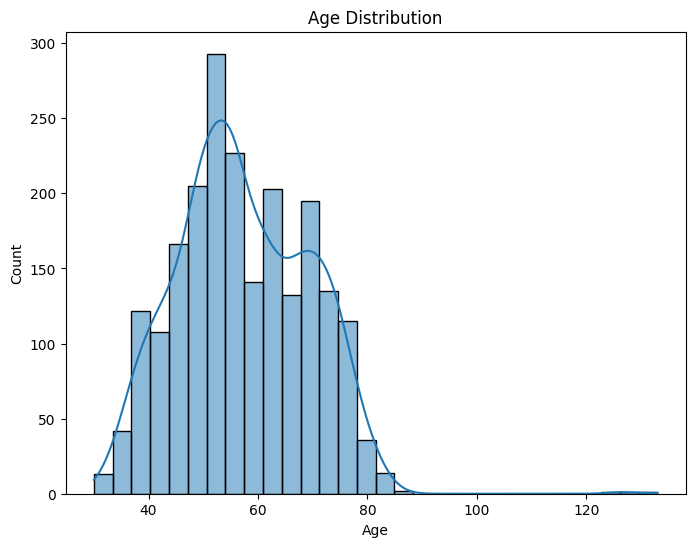

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

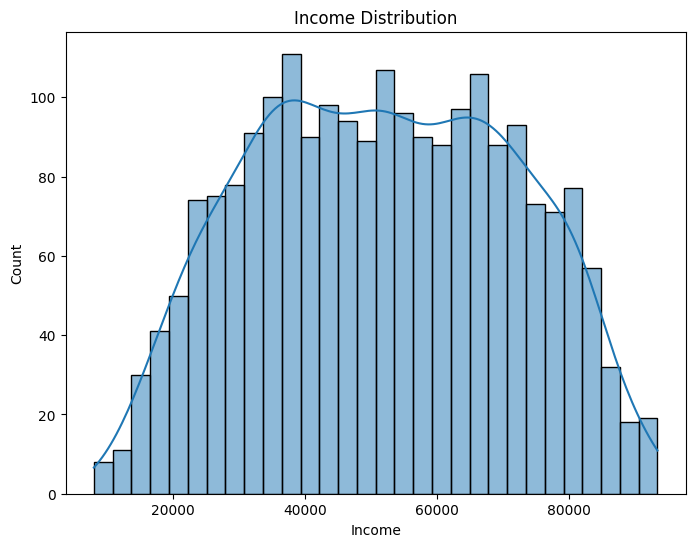

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(df['Income'],bins=30,kde=True)
plt.title('Income Distribution')
plt.show()

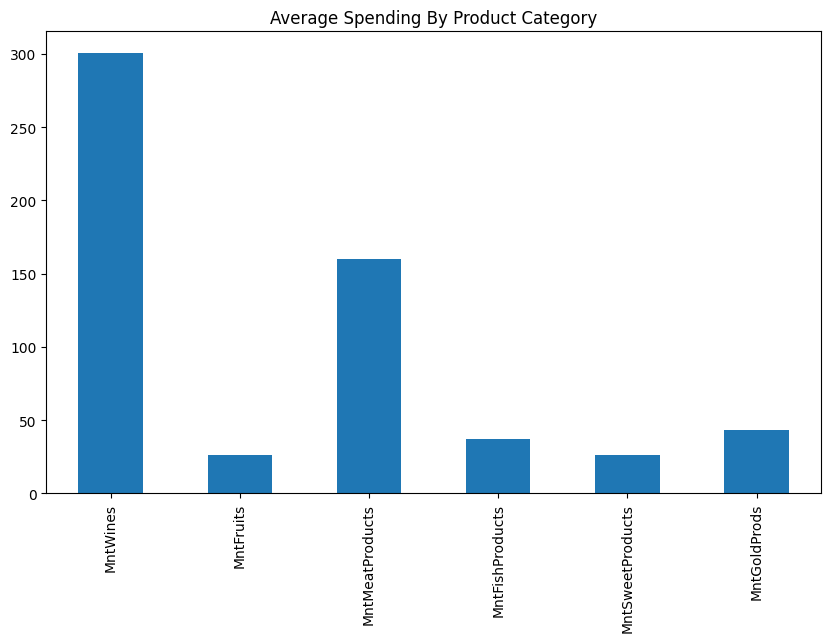

In [42]:
spend_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df[spend_cols].mean().plot(kind='bar',figsize=(10,6))
plt.title('Average Spending By Product Category')
plt.show()

#### Bivariate Analysis

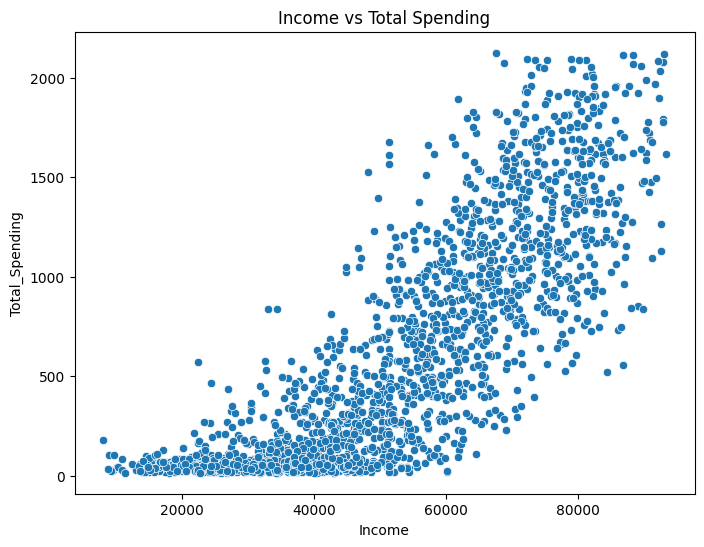

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income',y='Total_Spending',data=df)
plt.title('Income vs Total Spending')
plt.show()

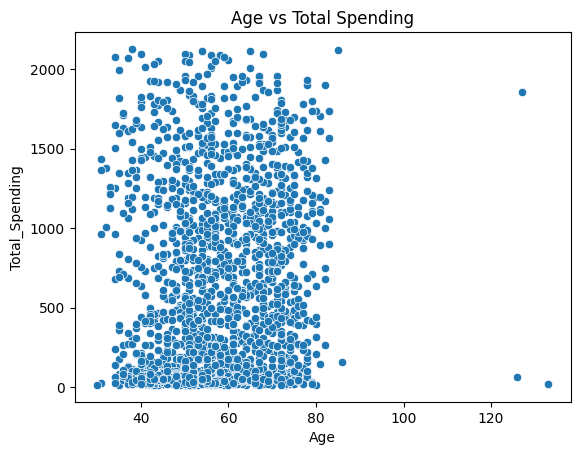

In [44]:
sns.scatterplot(x='Age',y='Total_Spending',data=df)
plt.title('Age vs Total Spending')
plt.show()

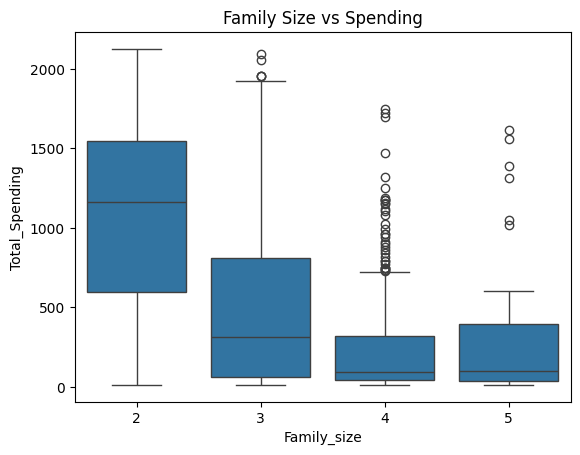

In [45]:
sns.boxplot(x='Family_size',y='Total_Spending',data=df)
plt.title('Family Size vs Spending')
plt.show()

In [46]:
edu_cols=[col for col in df.columns if col.startswith('Education_')]
edu_spending=df.groupby(edu_cols).mean()['Total_Spending']
print(edu_spending)

Education_Basic  Education_Graduation  Education_Master  Education_PhD
False            False                 False             False            496.964286
                                                         True             675.618534
                                       True              False            586.460452
                 True                  False             False            601.912523
True             False                 False             False             81.480769
Name: Total_Spending, dtype: float64


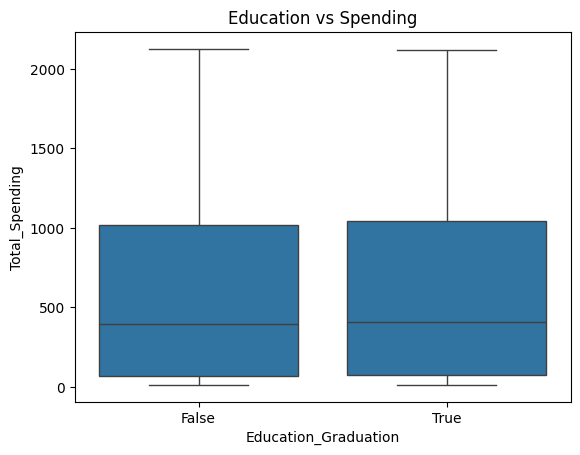

In [47]:
sns.boxplot(x='Education_Graduation',y='Total_Spending',data=df)
plt.title('Education vs Spending')
plt.show()

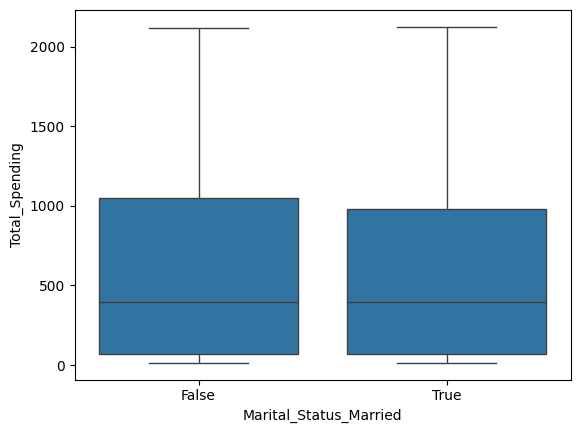

In [48]:
mar_cols=[col for col in df.columns if col.startswith('Marital_Status_')]
sns.boxplot(x='Marital_Status_Married',y='Total_Spending',data=df)
plt.show()

In [49]:
df['Responded_any'].value_counts(normalize=True)

Responded_any
0    0.734665
1    0.265335
Name: proportion, dtype: float64

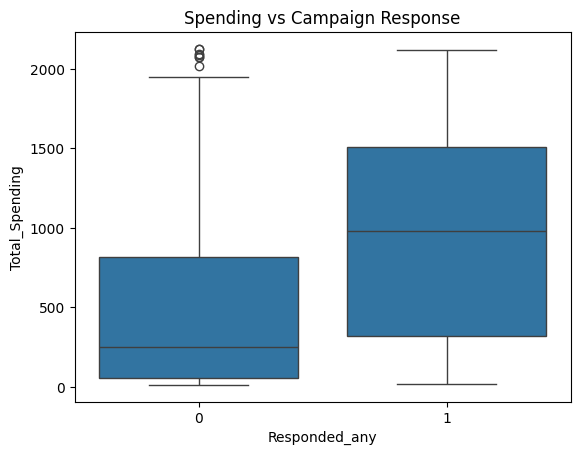

In [50]:
sns.boxplot(x='Responded_any',y='Total_Spending',data=df)
plt.title('Spending vs Campaign Response')
plt.show()


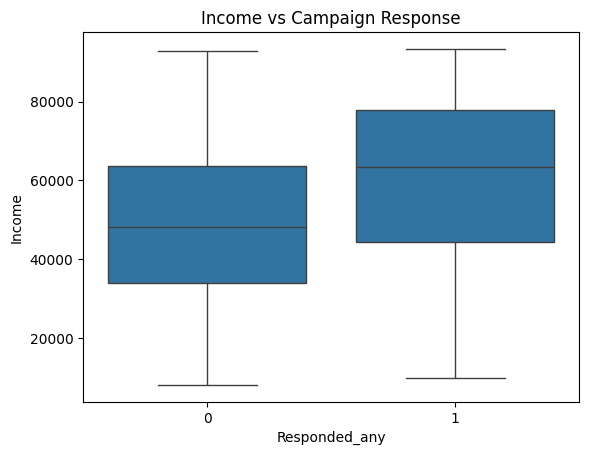

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,...,True,False,False,False,False,False,True,False,False,False
1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,...,True,False,False,False,False,False,True,False,False,False
2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,...,True,False,False,False,False,False,False,True,False,False
3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,...,True,False,False,False,False,False,False,True,False,False
4,58293.0,1,0,2014-01-19,94,173,43,118,46,27,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,2013-06-13,46,709,43,182,42,118,...,True,False,False,False,False,True,False,False,False,False
2236,64014.0,2,1,2014-06-10,56,406,0,30,0,0,...,False,False,True,False,False,False,False,True,False,False
2237,56981.0,0,0,2014-01-25,91,908,48,217,32,12,...,True,False,False,False,True,False,False,False,False,False
2238,69245.0,0,1,2014-01-24,8,428,30,214,80,30,...,False,True,False,False,False,False,False,True,False,False


In [51]:
sns.boxplot(x='Responded_any',y='Income',data=df)
plt.title('Income vs Campaign Response')
plt.show()
df

In [52]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'customer_since_year', 'Customer_tenure', 'Age', 'Family_size',
       'Has_children', 'Total_Spending', 'Total_Campaign_Response',
       'Responded_any', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

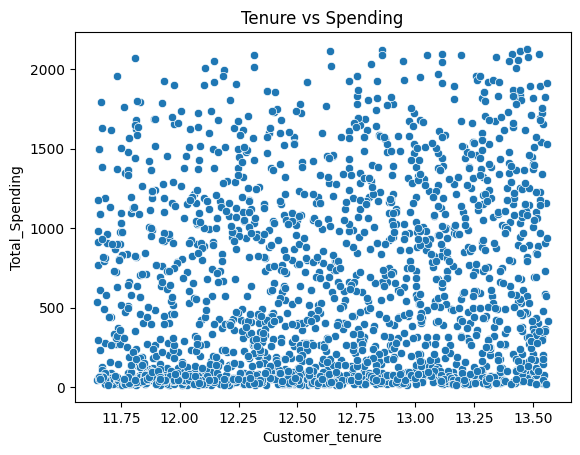

In [53]:
sns.scatterplot(x='Customer_tenure',y='Total_Spending',data=df)
plt.title('Tenure vs Spending')
plt.show()

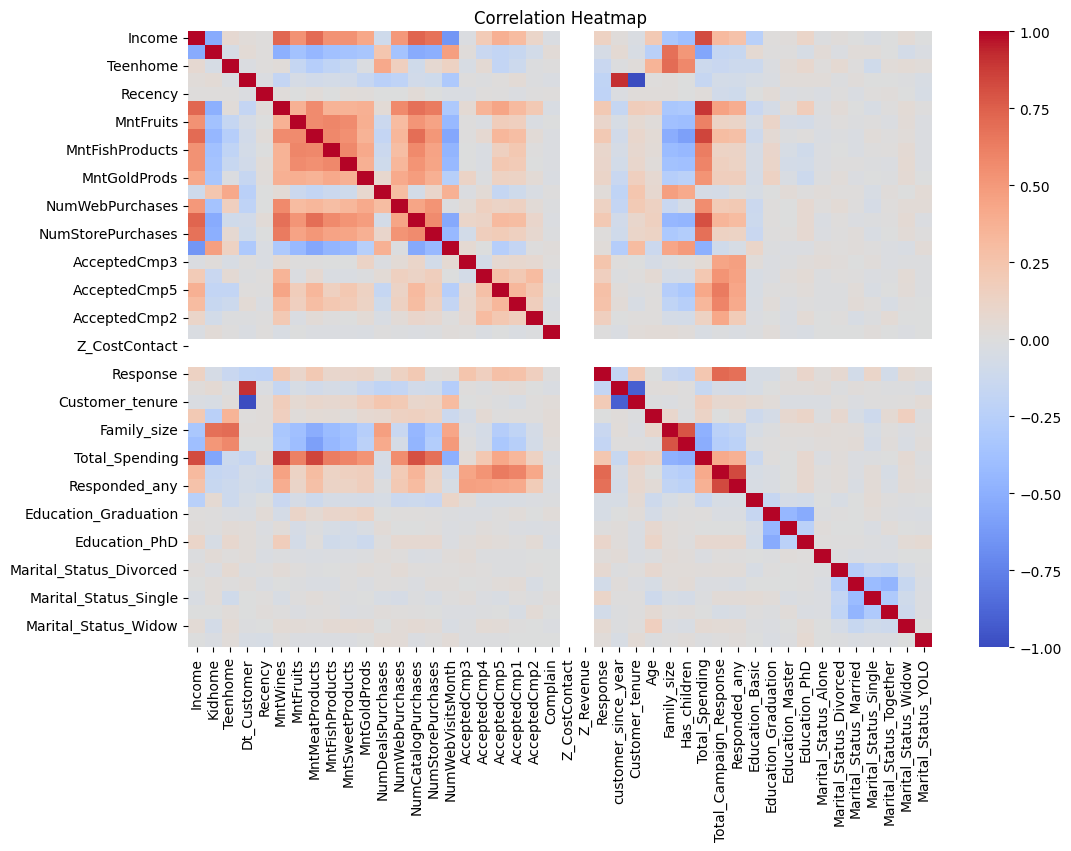

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=False)
plt.title('Correlation Heatmap')
plt.show()

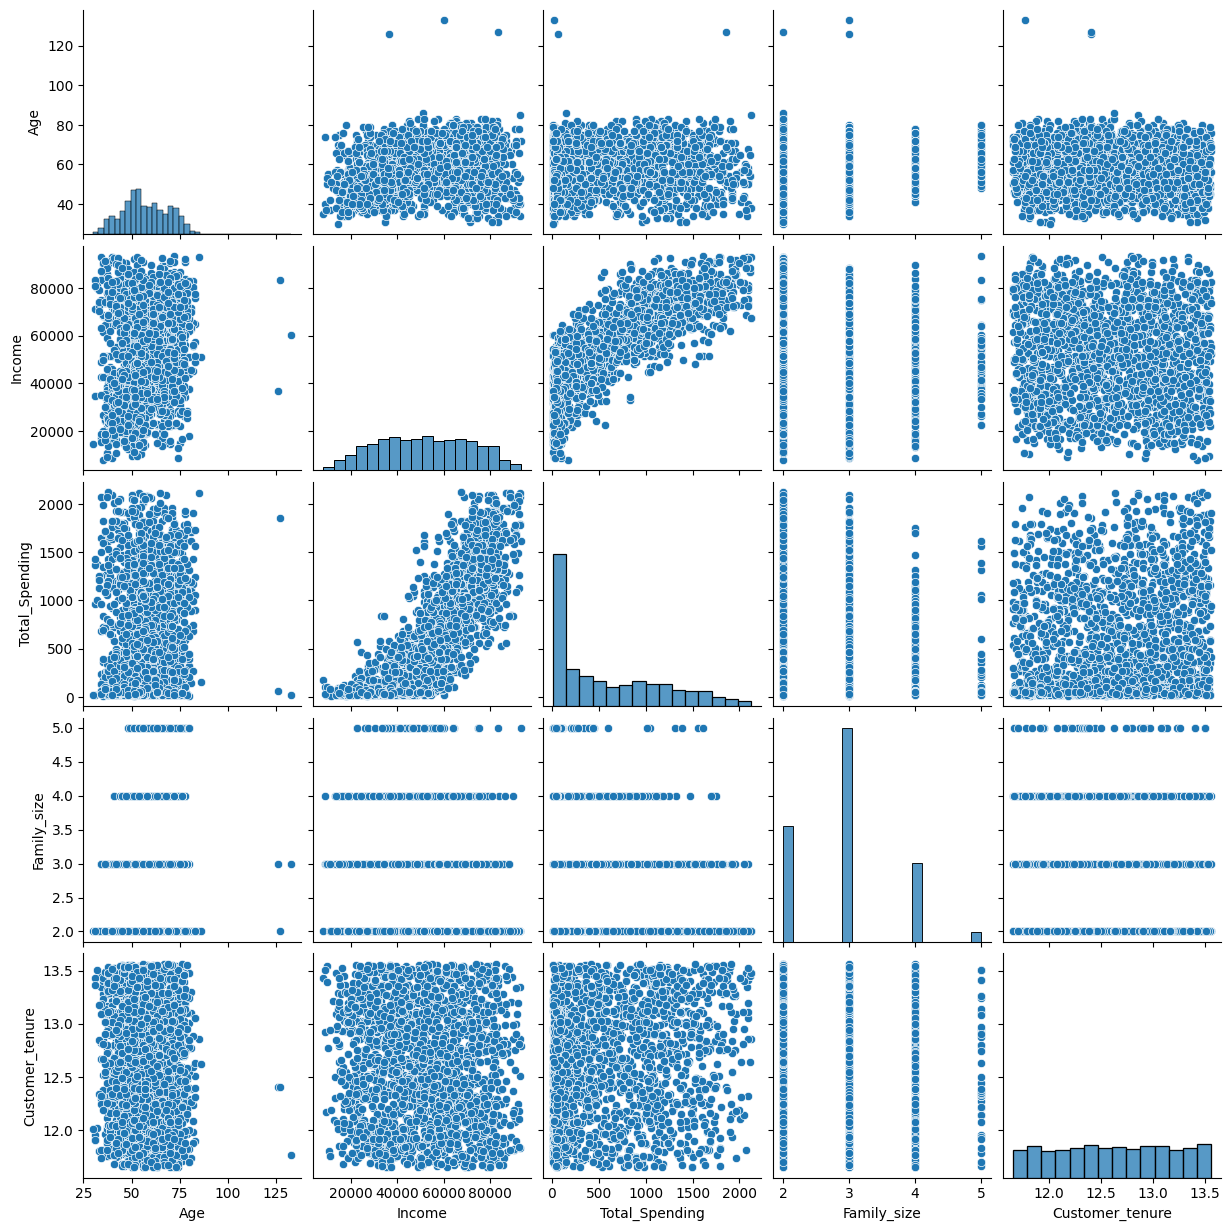

In [55]:
sns.pairplot(df[['Age','Income','Total_Spending','Family_size','Customer_tenure']])
plt.show()

#### Spending Category and Persona

In [56]:
df['Spending_Level']=pd.qcut(df['Total_Spending'],3,labels=['Low','Medium','High'])
df['Spending_Level'].value_counts()

Spending_Level
Medium    718
Low       717
High      717
Name: count, dtype: int64

In [57]:
conditions=[
    (df['Income'] > 70000) & (df['Total_Spending'] > 1500),
    (df['Family_size'] > 3) & (df['Total_Spending'] > 1000),
    (df['Total_Spending'] < 500)
]
choices = ['Luxury Buyers', 'Family Shoppers', 'Budget Customers']
df['Persona']=np.select(conditions,choices,default='Regular')
df['Persona'].value_counts()

Persona
Budget Customers    1196
Regular              767
Luxury Buyers        171
Family Shoppers       18
Name: count, dtype: int64

### Insights from EDA

#### Income strongly correlates with total spending

#### Wines & meat products are top revenue drivers

#### Campaign responders are high-value customers

#### Middle-aged customers spend the most

#### Families spend more on food categories

#### Education level correlates with income and spending

#### Tenure positively impacts loyalty & spending

##
### Clustering segmentation using PCA+KMeans

In [60]:
cluster_features=[
    'Age', 'Income', 'Total_Spending', 
    'Family_size', 'Customer_tenure'
]

X = df[cluster_features]

#### Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#### Finding Optimal No of Clusters using Elbow and Silhouette

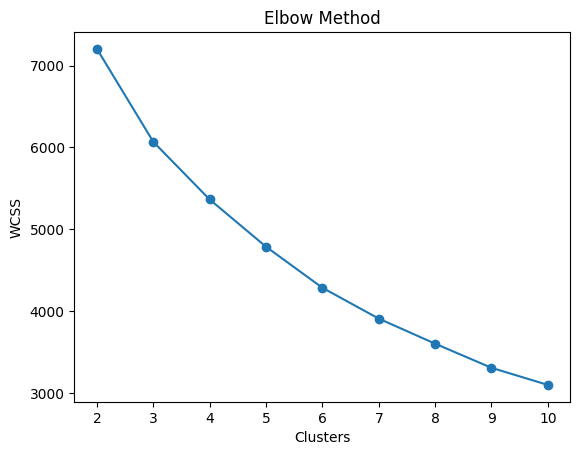

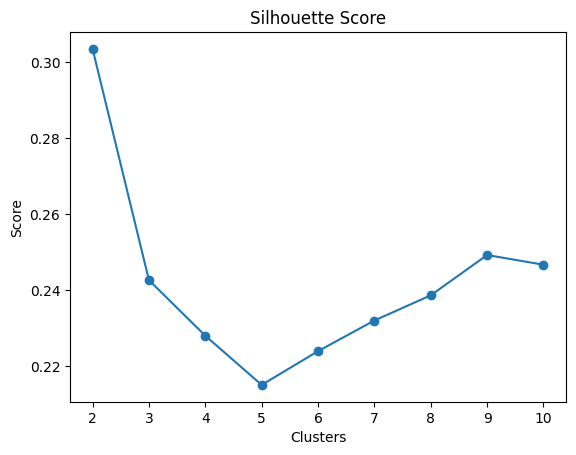

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss=[]
sil_scores=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    labels=kmeans.fit_predict(X_scaled)

    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled,labels))

plt.figure()
plt.plot(range(2,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')


plt.figure()
plt.plot(range(2,11),sil_scores,marker='o')
plt.title('Silhouette Score')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()

#### Taking K=3,4 or 5 works best, here we will take k=4

In [66]:
kmeans=KMeans(n_clusters=4,random_state=42,n_init=10)
df['Cluster']=kmeans.fit_predict(X_scaled)

In [67]:
df

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Spending_Level,Persona,Cluster
0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,...,False,False,False,True,False,False,False,High,Regular,0
1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,...,False,False,False,True,False,False,False,Low,Budget Customers,3
2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,...,False,False,False,False,True,False,False,Medium,Regular,1
3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,...,False,False,False,False,True,False,False,Low,Budget Customers,2
4,58293.0,1,0,2014-01-19,94,173,43,118,46,27,...,False,False,True,False,False,False,False,Medium,Budget Customers,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,2013-06-13,46,709,43,182,42,118,...,False,False,True,False,False,False,False,High,Regular,0
2236,64014.0,2,1,2014-06-10,56,406,0,30,0,0,...,False,False,False,False,True,False,False,Medium,Budget Customers,3
2237,56981.0,0,0,2014-01-25,91,908,48,217,32,12,...,False,True,False,False,False,False,False,High,Regular,1
2238,69245.0,0,1,2014-01-24,8,428,30,214,80,30,...,False,False,False,False,True,False,False,High,Regular,1


### PCA 2D Cluster Visualization

In [69]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

df['PC1']=X_pca[:,0]
df['PC2']=X_pca[::,1]

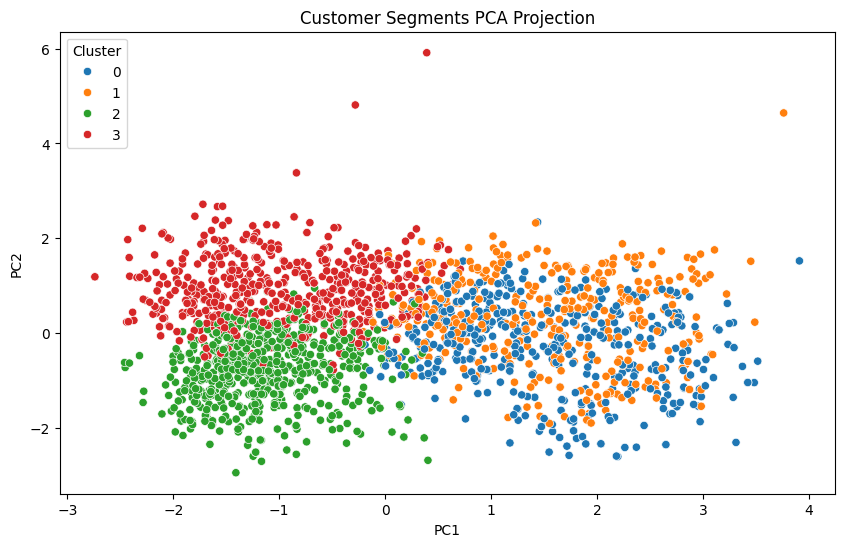

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1',y='PC2',hue='Cluster',data=df,palette='tab10')
plt.title('Customer Segments PCA Projection')
plt.show()

In [75]:
cluster_profile=df.groupby('Cluster')[cluster_features+['Total_Campaign_Response']].mean()
cluster_profile

,Age,Income,Total_Spending,Family_size,Customer_tenure,Total_Campaign_Response
Cluster,,,,,,
0,59.351812,68144.068230,1226.643923,2.605544,13.152951,0.739872
1,59.551559,72318.176259,1108.764988,2.374101,12.144844,0.709832
2,49.050000,32194.076515,141.427273,2.822727,12.632113,0.206061
3,63.105611,46010.402640,239.966997,3.778878,12.522650,0.198020


In [76]:
df['Cluster'].value_counts()

Cluster
2    660
3    606
0    469
1    417
Name: count, dtype: int64

### Behavorial Differences by Cluster

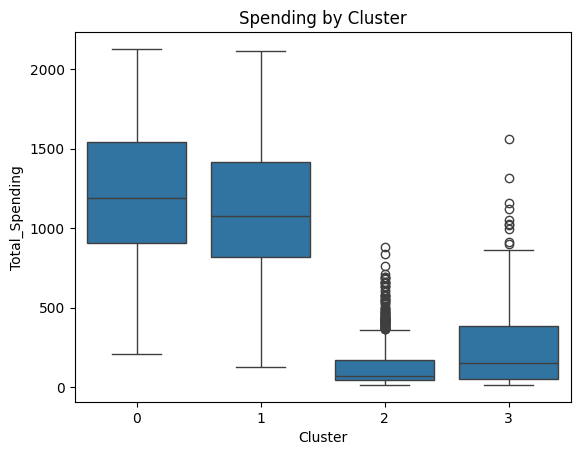

In [77]:
sns.boxplot(x='Cluster',y='Total_Spending',data=df)
plt.title('Spending by Cluster')
plt.show()

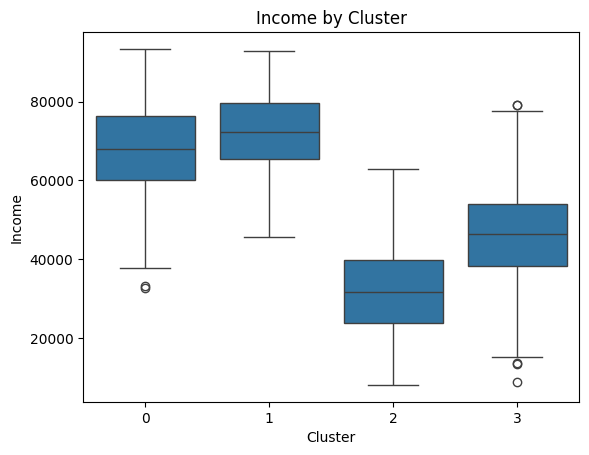

In [78]:
sns.boxplot(x='Cluster',y='Income',data=df)
plt.title('Income by Cluster')
plt.show()

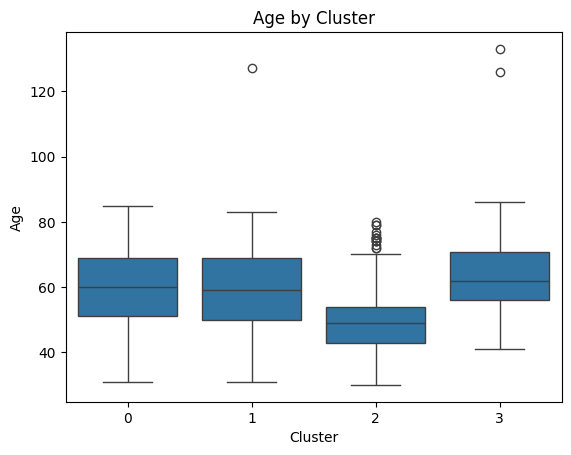

In [79]:
sns.boxplot(x='Cluster',y='Age',data=df)
plt.title('Age by Cluster')
plt.show()

### Campaign Response by Cluster

In [81]:
pd.crosstab(df['Cluster'],df['Responded_any'],normalize='index')

Responded_any,0,1
Cluster,,
0,0.588486,0.411514
1,0.589928,0.410072
2,0.837879,0.162121
3,0.834983,0.165017


### Cluster 0 - Luxury Buyers
#### High Income, Spending and Respond well to campaigns

### Cluster 1- Family Shoppers
#### Medium Income Large Family size and high food spending

### Cluster 2- Budget Customers(Default)
#### Low income, Spending and rarely respond

### Cluster 3- Young/Moderate Spenders
#### Younger customers, Medium spending, Good campaign targets

###

### Comparing scaling assumptions

In [82]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X_mm=mm.fit_transform(X)
kmeans_mm=KMeans(n_clusters=4,random_state=42,n_init=10)
df['Cluster_mm']=kmeans_mm.fit_predict(X_mm)

In [83]:
from sklearn.metrics import adjusted_rand_score
print('Std vs MinMax ARI:', adjusted_rand_score(df['Cluster'],df['Cluster_mm']))

Std vs MinMax ARI: 0.4500616989139289


#### ARI is 0.45 which means, scaling significantly affects customer segmentation, but some core customer gorups remain consistent

In [84]:
from sklearn.metrics import silhouette_score

print("Silhouette Std:", silhouette_score(X_scaled, df['Cluster']))
print("Silhouette MinMax:", silhouette_score(X_mm, df['Cluster_mm']))


Silhouette Std: 0.2280046411234277
Silhouette MinMax: 0.27568665387393076


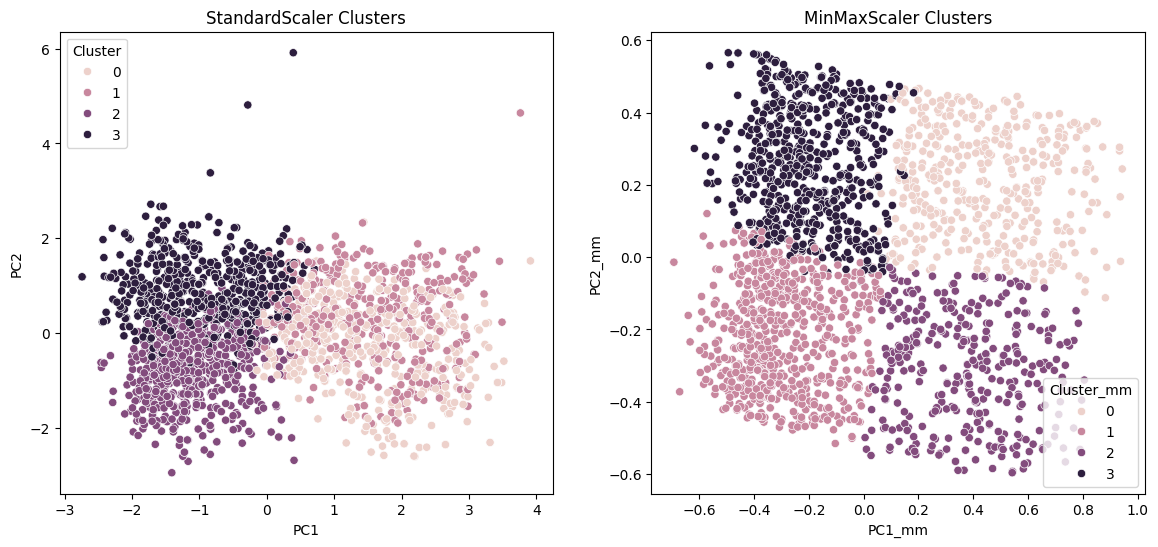

In [85]:
from sklearn.decomposition import PCA

# PCA on MinMax
pca_mm = PCA(n_components=2)
X_pca_mm = pca_mm.fit_transform(X_mm)

df['PC1_mm'] = X_pca_mm[:,0]
df['PC2_mm'] = X_pca_mm[:,1]

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.scatterplot(ax=axes[0], x='PC1', y='PC2', hue='Cluster', data=df)
axes[0].set_title("StandardScaler Clusters")

sns.scatterplot(ax=axes[1], x='PC1_mm', y='PC2_mm', hue='Cluster_mm', data=df)
axes[1].set_title("MinMaxScaler Clusters")

plt.show()
